In [1]:
import os
os.getcwd()

'/media/mojoee/01fc00c5-9a41-40f6-8f0e-d25ee6a8c4be/mojoee/Development/YouBike/YouBikeLive/src/poster'

Feature Correlation with Demand:
 demand                    1.000000
available_rent_bikes      0.179038
pressure                  0.007625
humidity                 -0.000186
temperature              -0.001123
rainfall                 -0.001892
wind_speed               -0.005441
capacity                 -0.005809
available_return_bikes   -0.179230
Name: demand, dtype: float64
Correlation heatmap saved as 'correlation_heatmap.png'


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.17972D+00    |proj g|=  4.30285D+00

At iterate    5    f= -1.23361D+00    |proj g|=  9.81664D-01

At iterate   10    f= -1.28161D+00    |proj g|=  4.22773D-01

At iterate   15    f= -1.28906D+00    |proj g|=  1.76475D+00

At iterate   20    f= -1.35183D+00    |proj g|=  1.22502D+00

At iterate   25    f= -1.38620D+00    |proj g|=  3.43103D-01

At iterate   30    f= -1.43354D+00    |proj g|=  2.23375D-01

At iterate   35    f= -1.44253D+00    |proj g|=  6.98499D-02

At iterate   40    f= -1.44432D+00    |proj g|=  2.74340D-02

At iterate   45    f= -1.44463D+00    |proj g|=  1.51198D-02
  ys=-1.901E-05  -gs= 5.928E-06 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     79      1     1     0   1.512D-02  -1.445D+00
  F =  -1.4446344040441625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.17972D+00    |proj g|=  4.30285D+00


 This problem is unconstrained.



At iterate    5    f= -1.23361D+00    |proj g|=  9.81664D-01

At iterate   10    f= -1.28161D+00    |proj g|=  4.22773D-01

At iterate   15    f= -1.28906D+00    |proj g|=  1.76475D+00

At iterate   20    f= -1.35183D+00    |proj g|=  1.22502D+00

At iterate   25    f= -1.38620D+00    |proj g|=  3.43103D-01

At iterate   30    f= -1.43354D+00    |proj g|=  2.23375D-01

At iterate   35    f= -1.44253D+00    |proj g|=  6.98499D-02

At iterate   40    f= -1.44432D+00    |proj g|=  2.74340D-02

At iterate   45    f= -1.44463D+00    |proj g|=  1.51198D-02
  ys=-1.901E-05  -gs= 5.928E-06 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     79      1     1     0   1.512D-02  -1.445D+00
  F =  -1.4446344040441625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/tmp/ipykernel_541317/3468564535.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(results_df["Model"], rotation=45)
/tmp/ipykernel_541317/3468564535.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(results_df["Model"], rotation=45)
/tmp/ipykernel_541317/3468564535.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(results_df["Model"], rotation=45)


Weather impact comparison plot saved as 'weather_impact_comparison.png'


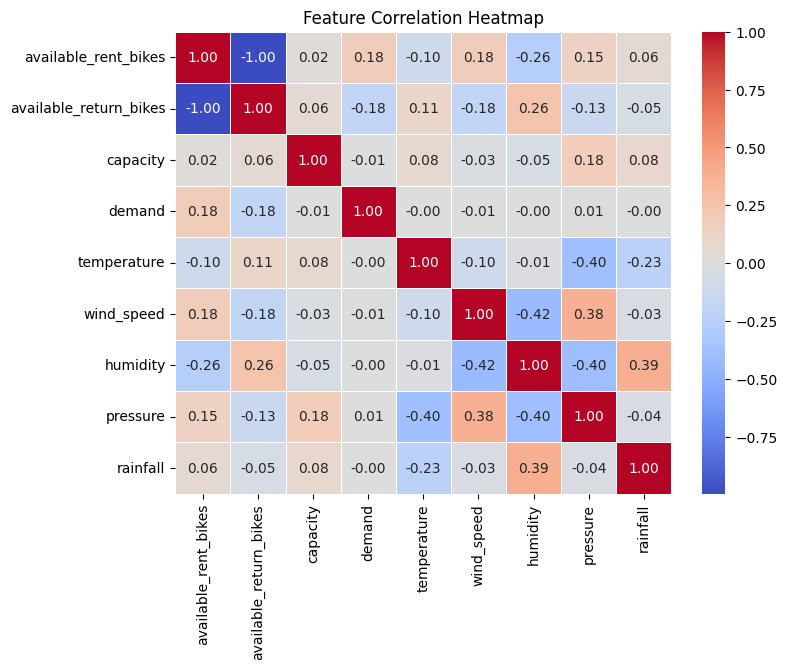

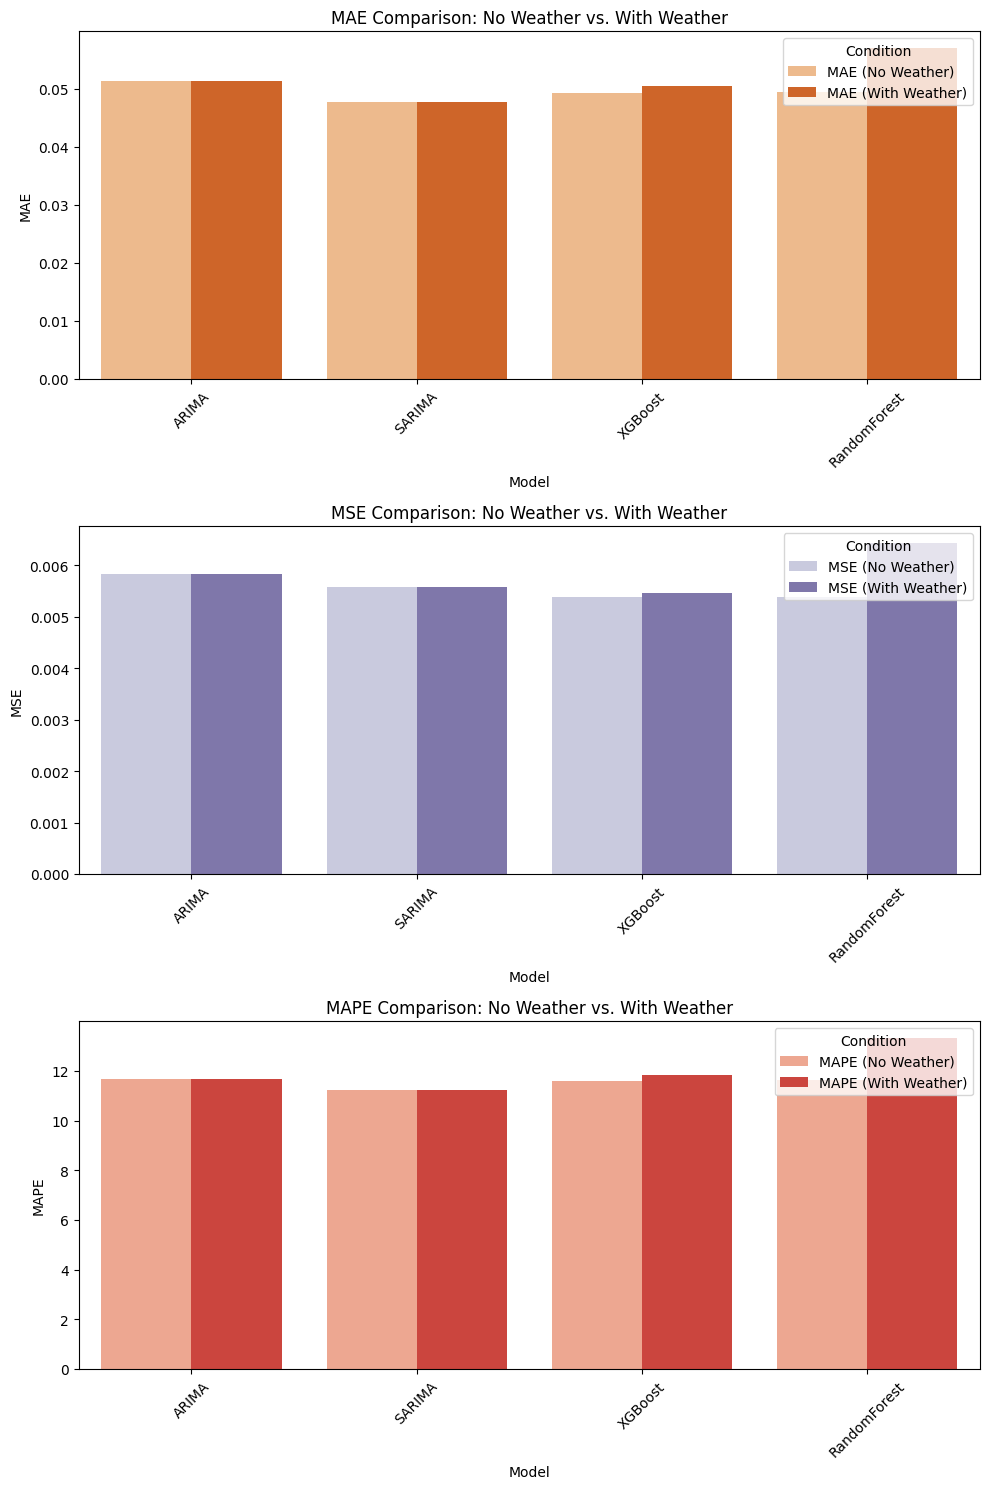

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor

# Load dataset
data_file = "../../data/prediction/processed_data_all_stations_weather_500101002.csv"  # Updated data directory
df = pd.read_csv(data_file)

# Convert timestamp to datetime and sort
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.sort_values("timestamp", inplace=True)

# Define feature sets
bike_features = ["available_rent_bikes", "available_return_bikes", "capacity"]
weather_features = ["temperature", "wind_speed", "humidity", "pressure", "rainfall"]
all_features = bike_features + weather_features

# Perform correlation analysis (excluding station_id and timestamp)
correlation = df.drop(columns=["youbike_station_id", "timestamp"]).corr()["demand"].sort_values(ascending=False)
print("Feature Correlation with Demand:\n", correlation)

# Plot correlation heatmap (excluding station_id and timestamp)
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=["youbike_station_id", "timestamp"]).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("./results/correlation_heatmap.png", dpi=300, bbox_inches="tight")
print("Correlation heatmap saved as 'correlation_heatmap.png'")

# Normalize data
scaler = MinMaxScaler()
df[bike_features + ["demand"]] = scaler.fit_transform(df[bike_features + ["demand"]])
df[weather_features] = scaler.fit_transform(df[weather_features])

# Train-test split
train_size = int(len(df) * 0.8)
df_train, df_test = df[:train_size], df[train_size:]

# Train models with and without weather features
def train_model(X_train, y_train, X_test, model_type):
    if model_type == "ARIMA":
        model = ARIMA(y_train, order=(5,1,0)).fit()
        return model.forecast(steps=len(X_test))
    elif model_type == "SARIMA":
        model = SARIMAX(y_train, order=(1,1,1), seasonal_order=(1,1,1,24)).fit()
        return model.forecast(steps=len(X_test))
    elif model_type == "XGBoost":
        model = XGBRegressor(n_estimators=100, learning_rate=0.1)
        model.fit(X_train, y_train)
        return model.predict(X_test)
    elif model_type == "RandomForest":
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        return model.predict(X_test)

# Prepare datasets
X_train_bike, X_test_bike = df_train[bike_features], df_test[bike_features]
X_train_all, X_test_all = df_train[all_features], df_test[all_features]
y_train, y_test = df_train["demand"], df_test["demand"]

# Train models
models = ["ARIMA", "SARIMA", "XGBoost", "RandomForest"]
results = []

for model in models:
    pred_bike = train_model(X_train_bike, y_train, X_test_bike, model)
    pred_all = train_model(X_train_all, y_train, X_test_all, model)
    
    results.append({
        "Model": model,
        "MAE (No Weather)": mean_absolute_error(y_test, pred_bike),
        "MSE (No Weather)": mean_squared_error(y_test, pred_bike),
        "MAPE (No Weather)": np.mean(np.abs((y_test - pred_bike) / y_test)) * 100,
        "MAE (With Weather)": mean_absolute_error(y_test, pred_all),
        "MSE (With Weather)": mean_squared_error(y_test, pred_all),
        "MAPE (With Weather)": np.mean(np.abs((y_test - pred_all) / y_test)) * 100
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df.to_csv("./results/weather_impact_comparison.csv", index=False)

# Plot Comparison
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
metrics = ["MAE", "MSE", "MAPE"]
colors = ["Oranges", "Purples", "Reds"]

def plot_metric(ax, metric, color):
    melted_df = results_df.melt(id_vars=["Model"], value_vars=[f"{metric} (No Weather)", f"{metric} (With Weather)"], var_name="Condition", value_name=metric)
    sns.barplot(x="Model", y=metric, hue="Condition", data=melted_df, palette=color, ax=ax)
    ax.set_title(f"{metric} Comparison: No Weather vs. With Weather")
    ax.set_xticklabels(results_df["Model"], rotation=45)
    ax.set_ylabel(metric)

for i, (metric, color) in enumerate(zip(metrics, colors)):
    plot_metric(axes[i], metric, color)

plt.tight_layout()
plt.savefig("./results/weather_impact_comparison.png", dpi=300, bbox_inches="tight")
print("Weather impact comparison plot saved as 'weather_impact_comparison.png'")
